In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

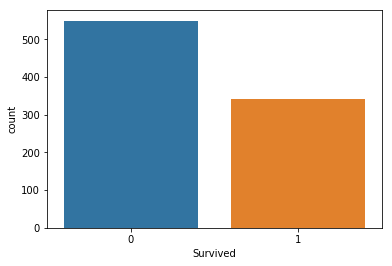

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
graph = sns.countplot(train_data['Survived'])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
print(train_data.columns)
train_data.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data = train_data.drop(['Cabin', 'Ticket','Name'],axis = 1)
train_data = train_data.drop(['Fare'],axis = 1)

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [8]:
test_data = test_data.drop(['Cabin', 'Ticket', 'Name'], axis = 1)
test_data = test_data.drop(['Fare'],axis = 1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [9]:
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64


In [10]:
train_data = train_data.fillna({"Embarked": "S"})
test_data = test_data.fillna({"Embarked": "S"})
train_data = train_data.fillna({"Age": "young"})


In [11]:
print(pd.isnull(train_data).sum())
train_data = train_data.drop(['Age'],axis = 1)
test_data = test_data.drop(['Age'],axis = 1)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64


In [12]:
train_data.Embarked.replace(to_replace = dict(S=1,Q=2,C=3), inplace=True)
test_data.Embarked.replace(to_replace = dict(S=1,Q=2,C=3), inplace=True)
train_data.Sex.replace(to_replace = dict(male=0,female=1), inplace=True)
test_data.Sex.replace(to_replace = dict(male=0,female=1), inplace=True)

In [13]:
train_data.head()
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked
0,892,3,0,0,0,2
1,893,3,1,1,0,1
2,894,2,0,0,0,2
3,895,3,0,0,0,1
4,896,3,1,1,1,1


**Machine Learning Alogorithm
LinearRegression**

In [14]:
prediction_class = train_data.drop(['PassengerId', 'Survived'],axis = 1) 
target = train_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(prediction_class, target, test_size=0.33, random_state=0)

In [15]:
reg = LogisticRegression()
model = reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
print(accuracy)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1]
78.98305084745762


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
ids = test_data['PassengerId']
predictions = reg.predict(test_data.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('output.csv', index=False)
output_data = pd.read_csv('output.csv')
print(output_data)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
